In [1]:
import pandas as pd
dataset = pd.read_csv('customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
X = dataset.iloc[:,[3,4]].values  #Annual Income (k$)	Spending Score (1-100)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [6]:
y_kmeans = kmeans.fit_predict(X)  # 就是给每一条记录计算它属于哪一个群的

In [14]:
import matplotlib.pyplot as plt

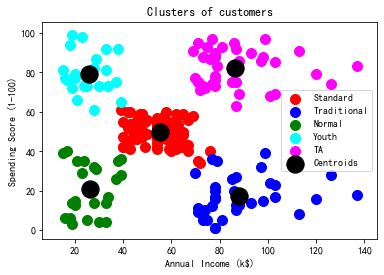

In [15]:
  plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
  plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Traditional')
  plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Normal')
  plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Youth')
  plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'TA')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
  plt.title('Clusters of customers')
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.legend()
  plt.show()

In [22]:
dataset[y_kmeans == 0].Age.mean()

42.71604938271605

In [23]:
dataset[y_kmeans == 1].Age.mean()

41.114285714285714

In [24]:
dataset[y_kmeans == 2].Age.mean()

45.21739130434783

In [25]:
dataset[y_kmeans == 3].Age.mean()

25.272727272727273

In [26]:
dataset[y_kmeans == 4].Age.mean()

32.69230769230769

In [16]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    error.append(kmeans.inertia_)

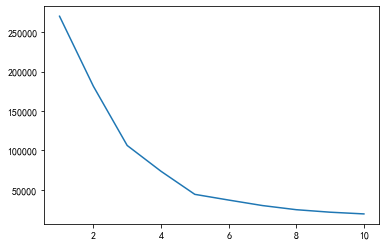

In [17]:
plt.plot(range(1,11),error)

In [28]:
### 用户年龄收入分群
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#加载数据
ageinc_df=pd.read_csv('ageinc.csv')
ageinc_df.info()
#两列数据，年龄与收入

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
income    1000 non-null int64
age       1000 non-null int64
dtypes: int64(2)
memory usage: 15.7 KB


In [29]:
ageinc_df.describe()

,income,age
count,1000.00000,1000.000000
mean,80116.81800,39.410000
std,39262.33567,10.976811
min,0.00000,18.000000
25%,46402.25000,30.000000
50%,78993.50000,39.000000
75%,114810.50000,49.000000
max,179294.00000,63.000000


In [30]:
ageinc_df['z_income']=(ageinc_df['income']-ageinc_df['income'].mean())/ageinc_df['income'].std()
#（收入-收入均值）/收入标准差
ageinc_df['z_age']=(ageinc_df['age']-ageinc_df['age'].mean())/ageinc_df['age'].std()
#（年龄-年龄均值）/年龄标准差
ageinc_df.describe()

,income,age,z_income,z_age
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03
mean,80116.81800,39.410000,1.421085e-17,3.037570e-16
std,39262.33567,10.976811,1.000000e+00,1.000000e+00
min,0.00000,18.000000,-2.040552e+00,-1.950475e+00
25%,46402.25000,30.000000,-8.587000e-01,-8.572617e-01
50%,78993.50000,39.000000,-2.861058e-02,-3.735147e-02
75%,114810.50000,49.000000,8.836378e-01,8.736599e-01
max,179294.00000,63.000000,2.526013e+00,2.149076e+00


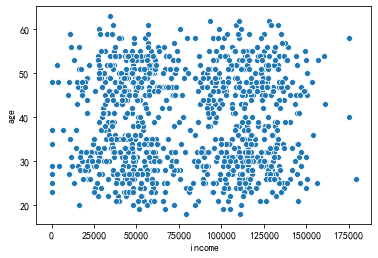

In [31]:
sns.scatterplot(x='income',y='age',data=ageinc_df)

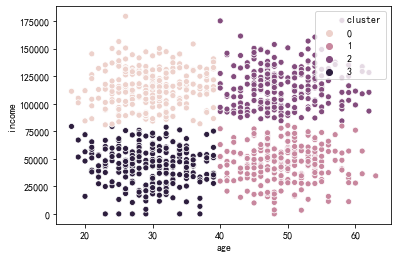

In [32]:
from sklearn import cluster
model=cluster.KMeans(n_clusters=4,random_state=10)
model.fit(ageinc_df[['z_income','z_age']])
#导入sklearn中的cluster
#将群体分成4层
#用标准化的收入与年龄来拟合模型
ageinc_df['cluster']=model.labels_
sns.scatterplot(x='age',y='income',hue='cluster',data=ageinc_df)
#横轴为年龄，纵轴为收入，分类为用户分群标签

In [33]:
ageinc_df.groupby(['cluster'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,258.0,115210.709302,16802.768499,80820.0,104076.00,114943.5,127979.25,179294.0
1,256.0,46482.371094,16357.141893,0.0,35781.75,47520.0,57161.75,80243.0
2,238.0,116199.844538,18110.799585,84364.0,100752.25,115183.0,127515.25,175497.0
3,248.0,43699.213710,17463.882999,0.0,31967.50,45212.5,56248.00,79360.0


In [34]:
### airbnb案例
import pandas as pd
airbnb=pd.read_csv('airbnb.csv')
#查看数据类型
#变量类别：用户个人信息、用户与airbnb的关系、app使用语言、用户去的国家、用户下单渠道
#这里有2个日期变量，之后会进行操作
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67936 entries, 0 to 67935
Data columns (total 14 columns):
age                     67936 non-null int64
date_account_created    67936 non-null object
date_first_booking      67936 non-null object
gender                  67936 non-null object
Language_EN             67936 non-null int64
Language_ZH             67936 non-null int64
Country_US              67936 non-null int64
Country_EUR             67936 non-null int64
android                 67936 non-null int64
moweb                   67936 non-null int64
web                     67936 non-null int64
ios                     67936 non-null int64
Married                 67936 non-null int64
Children                67936 non-null int64
dtypes: int64(11), object(3)
memory usage: 7.3+ MB


In [35]:
airbnb.shape

(67936, 14)

In [36]:
airbnb.describe()

,age,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
count,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000
mean,47.874249,0.974476,0.005947,0.713907,0.159091,0.658355,0.340423,0.895828,0.067534,0.790155,1.536696
std,146.090906,0.157711,0.076886,0.451937,0.365764,0.474265,0.473855,0.305485,0.250947,0.407201,0.836273
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,42.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [37]:
airbnb = airbnb[airbnb['age']<=70]
airbnb = airbnb[airbnb['age']>=18]

In [38]:
airbnb.describe()

,age,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
count,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000,65982.000000
mean,35.758449,0.974129,0.006062,0.714998,0.158407,0.653208,0.345534,0.894668,0.068579,0.790322,1.535510
std,10.501463,0.158751,0.077625,0.451419,0.365125,0.475952,0.475546,0.306983,0.252739,0.407082,0.837236
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,41.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [41]:
### 日期时间格式处理
airbnb['date_account_created']=pd.to_datetime(airbnb['date_account_created'])

In [43]:
# 计算注册距今时间有几年
airbnb['year_since_account_created'] = airbnb['date_account_created'].apply(lambda x:2019-x.year)

In [44]:
airbnb['year_since_account_created'].describe()

count    65982.000000
mean         6.035282
std          0.965382
min          5.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: year_since_account_created, dtype: float64

In [45]:
airbnb['date_first_booking']=pd.to_datetime(airbnb['date_first_booking'])

In [48]:
# 计算第一次订房距今多久
airbnb['year_since_first_booking'] = airbnb['date_first_booking'].apply(lambda x:2019-x.year)

In [51]:
airbnb = pd.get_dummies(airbnb)

In [53]:
airbnb.drop(airbnb.select_dtypes(['datetime64']),inplace=True,axis = 1)

In [56]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65982 entries, 0 to 67935
Data columns (total 16 columns):
age                           65982 non-null int64
Language_EN                   65982 non-null int64
Language_ZH                   65982 non-null int64
Country_US                    65982 non-null int64
Country_EUR                   65982 non-null int64
android                       65982 non-null int64
moweb                         65982 non-null int64
web                           65982 non-null int64
ios                           65982 non-null int64
Married                       65982 non-null int64
Children                      65982 non-null int64
year_since_account_created    65982 non-null int64
year_since_first_booking      65982 non-null int64
gender_F                      65982 non-null uint8
gender_M                      65982 non-null uint8
gender_U                      65982 non-null uint8
dtypes: int64(13), uint8(3)
memory usage: 7.2 MB


In [57]:
# 选择5个变量 进行分群
airbnb_5=airbnb[['age','web','moweb','ios','android']]

In [59]:
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)
airbnb_5['cluster']=model.labels_ # 将分类标签添加到数据中

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
airbnb_5.head()

,age,web,moweb,ios,android,cluster
0,56,1,0,0,1,1
1,42,1,1,0,0,0
2,41,1,0,0,1,1
3,46,1,0,0,1,1
4,47,1,0,0,1,1


In [61]:
# 模型评估
airbnb_5.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,20984.0,34.866517,9.576614,18.0,28.0,33.0,39.0,70.0
1,40473.0,36.531638,11.063559,18.0,29.0,34.0,42.0,70.0
2,4525.0,32.979006,8.440972,18.0,27.0,31.0,37.0,70.0


In [69]:
airbnb_5.groupby(['cluster'])['android'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,20984.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,40473.0,0.998789,0.034774,0.0,1.0,1.0,1.0,1.0
2,4525.0,0.591381,0.491633,0.0,0.0,1.0,1.0,1.0


In [64]:
# 模型评估
from sklearn import metrics
x_cluster = model.fit_predict(x)
metrics.silhouette_score(x,x_cluster)

In [65]:
metrics.silhouette_score(x,x_cluster)

0.6304549142727769

In [67]:
centers = pd.DataFrame(model.cluster_centers_)

In [70]:
airbnb_5.columns

Index(['age', 'web', 'moweb', 'ios', 'android', 'cluster'], dtype='object')

In [68]:
centers

,0,1,2,3,4
0,-0.084935,0.230108,1.372846,-0.271346,-1.372435
1,0.073627,0.206536,-0.726610,-0.271346,0.726088
2,-0.264674,-2.914415,0.132659,3.685330,-0.129903


In [72]:
### mobike
mobike = pd.read_csv('mobike.csv')
mobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           6427 non-null int64
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null object
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 753.2+ KB


In [73]:
mobike.shape

(6427, 15)

In [74]:
mobike.describe()

,Unnamed: 0,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear
count,6427.000000,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,5956.000000
mean,317005.228411,2.135519e+07,11.778902,3491.637934,195.038432,198.502567,1982.488583
std,184583.896111,2.181294e+05,9.692236,1912.171846,148.170025,148.939873,11.147859
min,51.000000,2.098358e+07,0.000000,2.000000,2.000000,2.000000,1906.000000
25%,159093.000000,2.116805e+07,5.000000,1852.000000,77.000000,80.000000,1977.000000
50%,314569.000000,2.135114e+07,9.000000,3618.000000,168.000000,172.000000,1986.000000
75%,476273.500000,2.154376e+07,15.000000,5179.500000,287.000000,287.000000,1991.000000
max,642522.000000,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2002.000000


In [75]:
mobike.drop('Unnamed: 0',axis = 1,inplace = True)

In [80]:
mobike['age']=mobike.age.str.replace('\'','').replace(' ','0').astype(int)

In [81]:
mobike.describe()

,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear,age
count,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,5956.000000,6427.000000
mean,2.135519e+07,11.778902,3491.637934,195.038432,198.502567,1982.488583,33.835693
std,2.181294e+05,9.692236,1912.171846,148.170025,148.939873,11.147859,14.342768
min,2.098358e+07,0.000000,2.000000,2.000000,2.000000,1906.000000,0.000000
25%,2.116805e+07,5.000000,1852.000000,77.000000,80.000000,1977.000000,27.000000
50%,2.135114e+07,9.000000,3618.000000,168.000000,172.000000,1986.000000,32.000000
75%,2.154376e+07,15.000000,5179.500000,287.000000,287.000000,1991.000000,41.000000
max,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2002.000000,113.000000


In [82]:
mobike = mobike[mobike['age']<=70]
mobike = mobike[mobike['age']>=18]

In [83]:
mobike.describe()

,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear,age
count,5.939000e+03,5939.000000,5939.000000,5939.000000,5939.000000,5939.000000,5939.000000
mean,2.136120e+07,10.817309,3506.519448,196.996969,201.032665,1982.591177,36.408823
std,2.182745e+05,8.477247,1916.098846,148.159023,148.888064,10.924396,10.924396
min,2.098358e+07,0.000000,2.000000,2.000000,3.000000,1949.000000,18.000000
25%,2.117430e+07,5.000000,1853.500000,77.000000,81.000000,1977.000000,28.000000
50%,2.136393e+07,8.000000,3637.000000,172.000000,174.000000,1986.000000,33.000000
75%,2.154985e+07,14.000000,5207.500000,288.000000,288.000000,1991.000000,42.000000
max,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2001.000000,70.000000


In [84]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 6426
Data columns (total 14 columns):
user_id              5939 non-null int64
start_time           5939 non-null object
end_time             5939 non-null object
timeduration         5939 non-null int64
bikeid               5939 non-null int64
tripduration         5939 non-null object
from_station_id      5939 non-null int64
from_station_name    5939 non-null object
to_station_id        5939 non-null int64
to_station_name      5939 non-null object
usertype             5939 non-null object
gender               5922 non-null object
birthyear            5939 non-null float64
age                  5939 non-null int32
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 672.8+ KB


In [93]:
mobike_ = mobike[['usertype','gender']]

In [99]:
mobike.gender.fillna('unkown',inplace = True)

In [102]:
mobike['gender'].value_counts()

Male      4623
Female    1299
unkown      17
Name: gender, dtype: int64

In [91]:
mobike_['tripduation'] = mobike['tripduration'].str.replace(',','').astype(int)

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
mobike_one_hot = pd.concat([mobike,pd.get_dummies(mobike_)],axis=1)

In [97]:
mobike_one_hot.columns

Index(['user_id', 'start_time', 'end_time', 'timeduration', 'bikeid',
       'tripduration', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male'],
      dtype='object')

In [108]:
mobike_= mobike_one_hot[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']]

In [119]:
mobike_3 = mobike_one_hot[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']]

In [120]:
mobike_3['tripduration'] = mobike_3['tripduration'].str.replace(',','').astype(int)

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
mobike_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 6426
Data columns (total 7 columns):
timeduration           5939 non-null int64
tripduration           5939 non-null int32
age                    5939 non-null int32
usertype_Customer      5939 non-null uint8
usertype_Subscriber    5939 non-null uint8
gender_Female          5939 non-null uint8
gender_Male            5939 non-null uint8
dtypes: int32(2), int64(1), uint8(4)
memory usage: 162.4 KB


In [123]:
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit(mobike_3)
mobike_3['cluster']=model.labels_ # 将分类标签添加到数据中

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
mobike_3.groupby('cluster').age.count()

cluster
0    5933
1       1
2       5
Name: age, dtype: int64

In [126]:
mobike_3['tripduration']=(mobike_3['tripduration']-mobike_3['tripduration'].mean())/mobike_3['tripduration'].std()
#（收入-收入均值）/收入标准差
mobike_3['timeduration']=(mobike_3['timeduration']-mobike_3['timeduration'].mean())/mobike_3['timeduration'].std()

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
e:\python\ai27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']])
mobike_3['cluster']=model.labels_ 

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [131]:
mobike_3.groupby('cluster').age.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2797.0,27.701108,3.019970,18.0,26.0,28.0,30.0,32.0
1,1144.0,55.107517,5.712397,47.0,50.0,55.0,59.0,70.0
2,1998.0,37.892392,3.836275,33.0,35.0,37.0,41.0,46.0


In [132]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']])
    error.append(kmeans.inertia_)

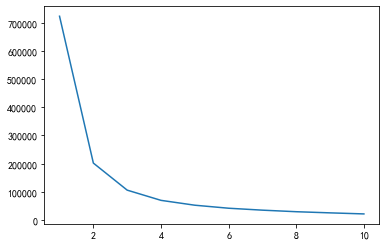

In [133]:
plt.plot(range(1,11),error)

In [134]:
x_cluster = model.fit_predict(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']])
metrics.silhouette_score(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']],x_cluster)

0.5399278008634184

In [137]:
centers = pd.DataFrame(model.cluster_centers_,columns=['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male'])

In [138]:
centers

,timeduration,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male
0,-0.020076,0.006295,27.701108,0.042188,0.957812,0.258849,0.738649
1,0.048773,0.018423,55.107517,0.026224,0.973776,0.180070,0.817308
2,0.000178,-0.019362,37.892392,0.030531,0.969469,0.184685,0.811812


### 促销策略和销量关系的回归分析

In [139]:
# index_col = 0  用数据的第0列作为 索引 ，否则pandas会自动添加一个索引列
store = pd.read_csv('store_rev.csv',index_col = 0)

In [140]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 7 columns):
revenue     985 non-null float64
reach       985 non-null int64
local_tv    929 non-null float64
online      985 non-null int64
instore     985 non-null int64
person      985 non-null int64
event       985 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 61.6+ KB


In [141]:
store.describe()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,929.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3970.934733,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28733.830000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31104.520000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33972.410000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [142]:
#缺失值判断
store.isnull().sum()

revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

In [143]:
# 查看不同促销策略   unique() 去重
store.event.unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

In [144]:
#查看不同的促销活动对不同渠道，以及销售额的影响
store.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,38277.664497,11879.097324,7146.99,30472.1525,37864.155,46333.5600,79342.07
holiday,103.0,37791.890583,11942.369136,5000.00,29644.5250,38432.780,46036.1300,73377.15
non_event,192.0,37903.081563,11186.436740,6874.43,29852.3775,37937.175,44611.6375,69429.39
special,292.0,38964.136438,11648.616882,10207.96,30325.8125,39197.870,45897.0400,71757.50


In [145]:
store.groupby(['event'])['local_tv'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,31424.590186,3951.049566,21252.35,28746.9725,31336.570,33839.0200,42162.64
holiday,96.0,30860.524896,4448.719364,21792.84,27769.6000,30564.705,33595.5975,41047.01
non_event,182.0,31415.197527,3952.155383,20000.00,29222.5875,31238.235,34386.0825,42069.84
special,275.0,31288.110982,3842.412128,21428.20,28668.7100,30921.790,34105.6250,43676.90


In [146]:
# event是分类特征 可以做one-hot编码
store = pd.get_dummies(store)

In [147]:
store

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
845,45860.28,2,31694.91,2115,3296,8,0,0,1,0
483,63588.23,2,35040.17,1826,2501,14,0,0,0,1
513,23272.69,4,30992.82,1851,2524,6,0,0,0,1
599,45911.23,2,29417.78,2437,3049,12,0,0,0,1
120,36644.23,2,35611.11,1122,1142,13,1,0,0,0
867,36172.81,4,22372.59,2001,1881,17,1,0,0,0
847,43797.03,3,31443.74,1667,1846,15,1,0,0,0
950,41629.80,4,35775.75,1155,2715,12,0,0,0,1
942,21303.48,2,24888.31,1853,3677,4,0,0,1,0
550,20746.15,4,26623.48,1497,3075,9,0,1,0,0


### 线性回归 ，相关性分析 比较重要 ，查看目标值和特征之间是否有比较强的关联

In [148]:
store.corr()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
revenue,1.000000,-0.155314,0.602114,0.171227,0.311739,0.559208,-0.005623,-0.016559,-0.019155,0.033752
reach,-0.155314,1.000000,-0.034039,-0.025141,0.035635,0.061417,0.043809,0.020398,-0.043128,-0.023330
local_tv,0.602114,-0.034039,1.000000,0.006775,-0.046825,0.048664,0.020886,-0.039650,0.011335,-0.005874
online,0.171227,-0.025141,0.006775,1.000000,-0.026399,0.036662,-0.024646,-0.018596,-0.020587,0.056799
instore,0.311739,0.035635,-0.046825,-0.026399,1.000000,-0.007482,-0.057725,0.045963,0.015495,0.017788
person,0.559208,0.061417,0.048664,0.036662,-0.007482,1.000000,0.002439,-0.025692,-0.025568,0.036771
event_cobranding,-0.005623,0.043809,0.020886,-0.024646,-0.057725,0.002439,1.000000,-0.281389,-0.405169,-0.534499
event_holiday,-0.016559,0.020398,-0.039650,-0.018596,0.045963,-0.025692,-0.281389,1.000000,-0.168151,-0.221824
event_non_event,-0.019155,-0.043128,0.011335,-0.020587,0.015495,-0.025568,-0.405169,-0.168151,1.000000,-0.319403
event_special,0.033752,-0.023330,-0.005874,0.056799,0.017788,0.036771,-0.534499,-0.221824,-0.319403,1.000000


In [149]:
store.corr()[['revenue']].sort_values('revenue',ascending = False)

,revenue
revenue,1.000000
local_tv,0.602114
person,0.559208
instore,0.311739
online,0.171227
event_special,0.033752
event_cobranding,-0.005623
event_holiday,-0.016559
event_non_event,-0.019155
reach,-0.155314


### 可视化分析

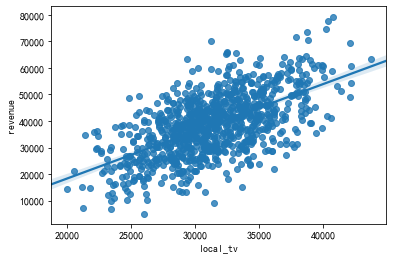

In [150]:
# seaborn 专门为回归分析提供可视化api  会画出所有x,y的点 并且会绘制一条尽量拟合所点的直线，帮助分析趋势
#x 坐标对应数据 y坐标对应的数据  所有数据所在的dataframe
sns.regplot('local_tv','revenue',store)

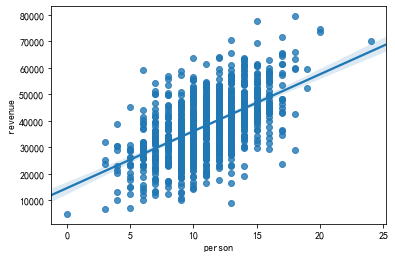

In [151]:
sns.regplot('person','revenue',store)

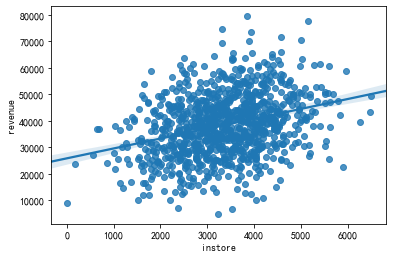

In [152]:
sns.regplot('instore','revenue',store)

### 线性回归分析

In [158]:
from sklearn.linear_model import LinearRegression
#创建线性回归的对象
model = LinearRegression()
# 确定目标和特征
y = store['revenue']
x = store[['local_tv','person','instore']]

In [159]:
model.fit(x,y)
# 如果输入的数据中有缺失值 或者 infinity 无限大  或者 超出了float64范围的 就会报错
#Input contains NaN, infinity or a value too large for dtype('float64').

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
store.local_tv.fillna(store.local_tv.mean(),inplace = True)

In [160]:
model.coef_

array([1.75153812e+00, 2.05057495e+03, 4.09032709e+00])

In [161]:
model.intercept_

-52881.12439059004

In [163]:
from sklearn.linear_model import LinearRegression
#创建线性回归的对象
model2 = LinearRegression()
# 确定目标和特征
y = store['revenue']
x1 = store[['local_tv','person','instore','online']]

In [164]:
model2.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
model2.coef_

array([1.74975212e+00, 2.02868682e+03, 4.13909283e+00, 3.69796299e+00])

In [166]:
model2.intercept_

-58650.54568919152

In [167]:
score = model.score(x,y)

In [168]:
score

0.7457537640646816

In [169]:
score = model2.score(x1,y)

In [170]:
score

0.7703955973368737

In [174]:
predictions = model.predict(x)
predictions2 = model2.predict(x1)

In [175]:
error = predictions-y
error2 = predictions2-y

In [176]:
rmse = (error**2).mean()**.5
rmse2 = (error2**2).mean()**.5

In [177]:
rmse

5884.181391972568

In [178]:
rmse2

5591.764749669001

In [180]:
mae = abs(error).mean()
mae2 = abs(error2).mean()

In [181]:
mae

4717.89476648171

In [182]:
mae2

4485.506383110859

### 逻辑回归用户流式分析

In [183]:
churn = pd.read_csv('churn.csv')

In [185]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
Churn                7043 non-null object
gender               7043 non-null object
Partner_att          7043 non-null int64
Dependents_att       7043 non-null int64
landline             7043 non-null int64
internet_att         7043 non-null int64
internet_other       7043 non-null int64
StreamingTV          7043 non-null int64
StreamingMovies      7043 non-null int64
Contract_Month       7043 non-null int64
Contract_1YR         7043 non-null int64
PaymentBank          7043 non-null int64
PaymentCreditcard    7043 non-null int64
PaymentElectronic    7043 non-null int64
MonthlyCharges       7043 non-null float64
TotalCharges         7043 non-null float64
dtypes: float64(2), int64(12), object(2)
memory usage: 880.5+ KB


In [186]:
churn.describe()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.483033,0.299588,0.903166,0.343746,0.439585,0.384353,0.387903,0.550192,0.209144,0.219225,0.216101,0.335794,64.761692,2275.929881
std,0.499748,0.458110,0.295752,0.474991,0.496372,0.486477,0.487307,0.497510,0.406726,0.413751,0.411613,0.472301,30.090047,2266.920469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,392.575000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1389.850000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,89.850000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


In [ ]:
### 处理分类变量   Churn 目标 是否会流失   gender 性别

In [187]:
churn = pd.get_dummies(churn)

In [189]:
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [190]:
churn.drop(['Churn_No','gender_Male'],axis = 1,inplace = True)

In [194]:
churn.columns = churn.columns.str.lower()

In [195]:
churn.columns

Index(['partner_att', 'dependents_att', 'landline', 'internet_att',
       'internet_other', 'streamingtv', 'streamingmovies', 'contract_month',
       'contract_1yr', 'paymentbank', 'paymentcreditcard', 'paymentelectronic',
       'monthlycharges', 'totalcharges', 'churn_yes', 'gender_female'],
      dtype='object')

In [196]:
churn = churn.rename(columns={'churn_yes':'flag'})

In [197]:
churn.flag.value_counts()

0    5174
1    1869
Name: flag, dtype: int64

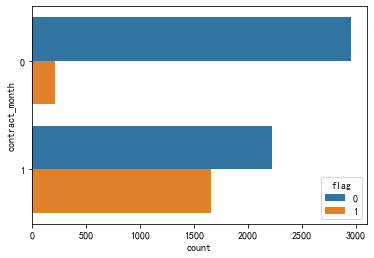

In [198]:
sns.countplot(y='contract_month',hue = 'flag',data=churn)

In [199]:
churn.corr()[['flag']].sort_values('flag',ascending = False)

,flag
flag,1.000000
contract_month,0.405103
internet_other,0.308020
paymentelectronic,0.301919
monthlycharges,0.193356
streamingtv,0.063228
streamingmovies,0.061382
landline,0.011942
gender_female,0.008612
paymentbank,-0.117937


### 逻辑回归模型创建

In [202]:
y = churn['flag'] #目标值
# 特征值 选择 按月付费用户  使用其他运营商互联网服务   电子支付用户
x = churn[['contract_month','internet_other','paymentelectronic']]

In [204]:
from sklearn.model_selection import train_test_split
# X 特征值 y目标值  train 训练集 test 测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

In [205]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [206]:
lr.fit(x_train,y_train)

e:\python\ai27\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
lr.intercept_

array([-3.18961458])

In [208]:
lr.coef_

array([[1.99091042, 1.04180272, 0.63926566]])

### 模型评估

In [210]:
y_pred_test = lr.predict(x_test)
import sklearn.metrics as metrics
metrics.accuracy_score(y_test,y_pred_test)

0.7624230951254141

In [212]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)

In [214]:
roc_auc = auc(fpr,tpr)
roc_auc

0.6472872378089588

### 社交电商

In [245]:
eshop1 = pd.read_csv('ecom.csv')

In [216]:
eshop1.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [229]:
pd.cut(eshop1['revenue'],[0,75,176,500,1000,3000,7000,104000]).value_counts()

(0, 75]           7488
(176, 500]        7415
(75, 176]         7246
(500, 1000]       4582
(1000, 3000]      2531
(3000, 7000]       163
(7000, 104000]      27
Name: revenue, dtype: int64

In [220]:
175/29452

0.005941871519760967

In [246]:
eshop2=eshop1[eshop1['revenue']<3000]

In [247]:
eshop2.count()

revenue                    29262
gender                     17623
age                        16638
engaged_last_30            17623
lifecycle                  29262
 days_since_last_order     29262
previous_order_amount      29262
3rd_party_stores           29262
dtype: int64

In [248]:
eshop2.dropna().corr()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
revenue,1.000000,0.036021,-0.077314,0.069142,0.112915,0.206348,-0.051761
gender,0.036021,1.000000,0.056531,0.041004,0.008507,0.070374,-0.016183
age,-0.077314,0.056531,1.000000,-0.052193,0.013888,-0.047197,0.098071
engaged_last_30,0.069142,0.041004,-0.052193,1.000000,-0.002226,0.168348,-0.029275
days_since_last_order,0.112915,0.008507,0.013888,-0.002226,1.000000,-0.090587,0.346135
previous_order_amount,0.206348,0.070374,-0.047197,0.168348,-0.090587,1.000000,-0.212756
3rd_party_stores,-0.051761,-0.016183,0.098071,-0.029275,0.346135,-0.212756,1.000000


In [249]:
eshop2.dropna(inplace=True)

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [250]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#设定自变量和因变量
y=eshop2['revenue']
#第一次三个 
#x=store[['local_tv','person','instore']]
#第二次四个 
x=eshop2[['engaged_last_30','previous_order_amount','gender']]
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
score = model.score(x,y)

In [252]:
score

0.04421909667751533

In [253]:
predictions = model.predict(x)
error = predictions-y
rmse = (error**2).mean()**.5

In [254]:
rmse

427.03384693957224

In [255]:
eshop = pd.read_csv('ecom.csv')
eshop_=eshop[eshop['revenue']<3000]

In [256]:
eshop = pd.read_csv('ecom.csv')

In [257]:
eshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     17723 non-null float64
age                        16716 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [258]:
eshop.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [262]:
pd.cut(eshop['revenue'],[0,10,75,176,500,1000,3000,7000,104000]).value_counts()

(176, 500]        7415
(10, 75]          7344
(75, 176]         7246
(500, 1000]       4582
(1000, 3000]      2531
(3000, 7000]       163
(0, 10]            144
(7000, 104000]      27
Name: revenue, dtype: int64

In [263]:
eshop2=eshop[eshop['revenue']<3000]

In [264]:
eshop2.corr()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
revenue,1.000000,0.035378,-0.077314,0.073438,0.102065,0.192360,-0.063153
gender,0.035378,1.000000,0.056531,0.040354,0.009405,0.080540,-0.016493
age,-0.077314,0.056531,1.000000,-0.052193,0.013888,-0.047197,0.098071
engaged_last_30,0.073438,0.040354,-0.052193,1.000000,-0.004633,0.160870,-0.031328
days_since_last_order,0.102065,0.009405,0.013888,-0.004633,1.000000,-0.081953,0.352797
previous_order_amount,0.192360,0.080540,-0.047197,0.160870,-0.081953,1.000000,-0.215657
3rd_party_stores,-0.063153,-0.016493,0.098071,-0.031328,0.352797,-0.215657,1.000000


In [265]:
import pandas as pd
import apriori
#加载数据文件
data = pd.read_csv('order_table.csv')
# 转换为关联所用的记录模式
order_ids = pd.unique(data['order_id'])
order_records = [data[data['order_id']==each_id]['product_name'].tolist() for each_id in order_ids]
# 通过调用自定义的apriori做关联分析
minS = 0.1  # 定义最小支持度阀值
minC = 0.5  # 定义最小置信度阀值
L, suppData = apriori.apriori(order_records, minSupport=minS)  # 计算得到满足最小支持度的规则
rules = apriori.generateRules(order_records, L, suppData, minConf=minC)  # 计算满足最小置信度的规则
# 关联结果报表评估
model_summary = 'data record: {1} \nassociation rules count: {0}'  # 展示数据集记录数和满足阀值定义的规则数量
print(model_summary.format(len(rules), len(order_records)),'\n','-'*60)  # 使用str.format做格式化输出
rules_all = pd.DataFrame(rules, columns=['item1', 'item2', 'instance', 'support', 'confidence',
                                  'lift'])  # 创建频繁规则数据框
rules_sort = rules_all.sort_values(['lift'],ascending=False)
rules_sort.head(10)

data record: 2240 
association rules count: 0 
 ------------------------------------------------------------


,item1,item2,instance,support,confidence,lift


In [266]:
data = pd.read_csv('order_table.csv')

In [278]:
order_records = [data[data['order_id']==each_id]['product_name'].tolist() for each_id in order_ids]
# 关联结果报表评估
model_summary = 'data record: {1} \nassociation rules count: {0}'  # 展示数据集记录数和满足阀值定义的规则数量
print(model_summary.format(len(rules), len(order_records)),'\n','-'*60)  # 使用str.format做格式化输出
rules_all = pd.DataFrame(rules, columns=['item1', 'item2', 'instance', 'support', 'confidence',
                                  'lift'])  # 创建频繁规则数据框
rules_sort = rules_all.sort_values(['lift'],ascending=False)

data record: 2240 
association rules count: 6 
 ------------------------------------------------------------


In [269]:
order_records

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [279]:
minS = 0.05  # 定义最小支持度阀值
minC = 0.2  # 定义最小置信度阀值
L, suppData = apriori.apriori(order_records, minSupport=minS)  # 计算得到满足最小支持度的规则
rules = apriori.generateRules(order_records, L, suppData, minConf=minC) 
rules = apriori.generateRules(order_records, L, suppData, minConf=minC)  # 计算满足最小置信度的规则
# 关联结果报表评估
model_summary = 'data record: {1} \nassociation rules count: {0}'  # 展示数据集记录数和满足阀值定义的规则数量
print(model_summary.format(len(rules), len(order_records)),'\n','-'*60)  # 使用str.format做格式化输出
rules_all = pd.DataFrame(rules, columns=['item1', 'item2', 'instance', 'support', 'confidence',
                                  'lift'])  # 创建频繁规则数据框
rules_sort = rules_all.sort_values(['lift'],ascending=False)
rules_sort.head(10)

data record: 2240 
association rules count: 6 
 ------------------------------------------------------------


,item1,item2,instance,support,confidence,lift
2,(whole milk),(yogurt),126,0.0563,0.2176,1.5674
3,(yogurt),(whole milk),126,0.0563,0.4051,1.5674
4,(whole milk),(other vegetables),162,0.0723,0.2798,1.4408
5,(other vegetables),(whole milk),162,0.0723,0.3724,1.4408
0,(whole milk),(rolls/buns),136,0.0607,0.2349,1.1744
1,(rolls/buns),(whole milk),136,0.0607,0.3036,1.1744


In [277]:
rules

[(frozenset({'whole milk'}),
  frozenset({'rolls/buns'}),
  136,
  0.0607,
  0.2349,
  1.1744),
 (frozenset({'rolls/buns'}),
  frozenset({'whole milk'}),
  136,
  0.0607,
  0.3036,
  1.1744),
 (frozenset({'whole milk'}),
  frozenset({'yogurt'}),
  126,
  0.0563,
  0.2176,
  1.5674),
 (frozenset({'yogurt'}),
  frozenset({'whole milk'}),
  126,
  0.0563,
  0.4051,
  1.5674),
 (frozenset({'whole milk'}),
  frozenset({'other vegetables'}),
  162,
  0.0723,
  0.2798,
  1.4408),
 (frozenset({'other vegetables'}),
  frozenset({'whole milk'}),
  162,
  0.0723,
  0.3724,
  1.4408)]